In [1]:
import pandas as pd
import json

In [2]:
# load json data
with open(r'C:\Users\RidhoBeteer\elclasico.json', encoding="utf8") as f:
    d = json.load(f)

In [3]:
# extract data from dict (credit to: https://github.com/karlosos/)
def extract_data_from_dict(data):
    match_id = data['matchId']
    event_types = data['matchCentreEventTypeJson']
    formation_mappings = data['formationIdNameMappings']
    events_dict = data['matchCentreData']['events']
    teams_dict = {
        data['matchCentreData']['home']['teamId']:data['matchCentreData']['home']['name'],
        data['matchCentreData']['away']['teamId']:data['matchCentreData']['away']['name']
    }
    players_dict = data['matchCentreData']['playerIdNameDictionary']
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df['teamId'] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df['teamId'] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df], ignore_index=True)

    return match_id, event_types, formation_mappings, events_dict, teams_dict, players_df

In [4]:
def get_match_events_list(events):
    event_list = []
    for event in events:
        event_list.append(event['type']['displayName'])

    return event_list

In [5]:
def get_events_df(events):
    df_events = pd.DataFrame(events)
    df_events['event_type'] = df_events.apply(lambda row: row['type']['displayName'], axis=1)
    df_events['outcome_type'] = df_events.apply(lambda row: row['outcomeType']['displayName'], axis=1)
    
    return df_events

In [6]:
match_id, event_types, formation_mappings, events_dict, teams_dict, players_df = extract_data_from_dict(d)

In [7]:
df_events = get_events_df(events_dict)
df_events = df_events.dropna(subset=["playerId"])
df_events['player_name'] = df_events['playerId'].map(players_df.set_index('playerId')['name'])
# df_events['matchday'] = 11
# df_events['competition'] = 'LaLiga'
df_events['opposing_team'] = df_events.apply(lambda row: 'Real Madrid' if row['teamId'] == 65 else 'Barcelona', axis=1)
df_events['isHome'] = df_events.apply(lambda row: True if row['teamId'] == 52 else False, axis=1)


In [8]:
event_types = {v: k for k, v in event_types.items()}
df_events['satisfiedEventsTypes'] = df_events['satisfiedEventsTypes'].apply(lambda x: [event_types[i] for i in x])

In [9]:
df_events

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,goalMouthZ,goalMouthY,isShot,cardType,isGoal,event_type,outcome_type,player_name,opposing_team,isHome
2,2.739510e+09,3,0,0.0,52,50.0,50.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Kylian Mbappé,Barcelona,True
3,2.739510e+09,4,0,3.0,52,28.0,52.3,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Unsuccessful,Antonio Rüdiger,Barcelona,True
4,2.739510e+09,3,0,8.0,65,23.0,75.3,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 44, 'displayName': 'Aerial'}",...,NaN,NaN,NaN,NaN,NaN,Aerial,Successful,Alejandro Balde,Real Madrid,False
5,2.739510e+09,5,0,8.0,52,77.0,24.7,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 44, 'displayName': 'Aerial'}",...,NaN,NaN,NaN,NaN,NaN,Aerial,Unsuccessful,Lucas Vázquez,Barcelona,True
6,2.739510e+09,4,0,9.0,65,20.8,76.3,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Alejandro Balde,Real Madrid,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,2.739585e+09,819,91,42.0,65,63.9,16.7,94,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Jules Koundé,Real Madrid,False
1357,2.739585e+09,820,91,50.0,65,94.2,15.6,94,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 50, 'displayName': 'Dispossessed'}",...,NaN,NaN,NaN,NaN,NaN,Dispossessed,Successful,Lamine Yamal,Real Madrid,False
1358,2.739585e+09,692,91,50.0,52,5.8,84.4,94,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 7, 'displayName': 'Tackle'}",...,NaN,NaN,NaN,NaN,NaN,Tackle,Successful,Fran García,Barcelona,True
1359,2.739585e+09,693,91,52.0,52,7.1,96.2,94,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 49, 'displayName': 'BallRecovery'}",...,NaN,NaN,NaN,NaN,NaN,BallRecovery,Successful,Jude Bellingham,Barcelona,True


In [10]:
df_raphinha = df_events.loc[df_events['player_name'] == 'Raphinha']
df_pass_raphinha = df_raphinha.loc[df_raphinha['event_type'] == 'Pass']
mask_success = df_pass_raphinha.outcome_type == 'Successful'

In [11]:
df_yamal = df_events.loc[df_events['player_name'] == 'Lamine Yamal']
df_pass_yamal = df_yamal.loc[df_yamal['event_type'] == 'Pass']
mask_success2 = df_pass_yamal.outcome_type == 'Successful'
df_pass_yamal

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,goalMouthZ,goalMouthY,isShot,cardType,isGoal,event_type,outcome_type,player_name,opposing_team,isHome
48,2.739512e+09,28,2,33.0,65,41.8,33.6,2,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Lamine Yamal,Real Madrid,False
137,2.739515e+09,84,7,44.0,65,78.1,9.1,7,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Unsuccessful,Lamine Yamal,Real Madrid,False
154,2.739516e+09,89,8,30.0,65,74.4,30.9,8,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Unsuccessful,Lamine Yamal,Real Madrid,False
171,2.739516e+09,94,9,11.0,65,69.4,59.9,9,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Unsuccessful,Lamine Yamal,Real Madrid,False
175,2.739517e+09,100,10,14.0,65,60.2,7.9,10,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Lamine Yamal,Real Madrid,False
178,2.739517e+09,103,10,24.0,65,55.5,26.2,10,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Lamine Yamal,Real Madrid,False
232,2.739519e+09,140,13,30.0,65,85.9,23.9,13,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Lamine Yamal,Real Madrid,False
258,2.739520e+09,159,15,1.0,65,61.7,8.0,15,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Lamine Yamal,Real Madrid,False
306,2.739522e+09,189,17,55.0,65,80.5,18.0,17,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Lamine Yamal,Real Madrid,False
309,2.739522e+09,191,18,0.0,65,79.9,14.1,18,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Unsuccessful,Lamine Yamal,Real Madrid,False


In [12]:
df_lewy = df_events.loc[df_events['player_name'] == 'Robert Lewandowski']
df_pass_lewy = df_lewy.loc[df_lewy['event_type'] == 'Pass']
mask_success3 = df_pass_lewy.outcome_type == 'Successful'
df_pass_lewy

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,goalMouthZ,goalMouthY,isShot,cardType,isGoal,event_type,outcome_type,player_name,opposing_team,isHome
36,2.739511e+09,22,2,3.0,65,28.1,11.7,2,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Unsuccessful,Robert Lewandowski,Real Madrid,False
122,2.739515e+09,74,7,6.0,65,45.3,98.4,7,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Robert Lewandowski,Real Madrid,False
206,2.739518e+09,121,12,21.0,65,47.0,47.8,12,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Robert Lewandowski,Real Madrid,False
587,2.739538e+09,357,40,44.0,65,35.0,76.0,40,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Robert Lewandowski,Real Madrid,False
613,2.739539e+09,373,42,4.0,65,44.0,73.0,42,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Robert Lewandowski,Real Madrid,False
704,2.739556e+09,437,45,13.0,65,59.6,59.4,48,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Unsuccessful,Robert Lewandowski,Real Madrid,False
732,2.739557e+09,462,46,33.0,65,77.9,43.9,49,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Unsuccessful,Robert Lewandowski,Real Madrid,False
743,2.739557e+09,471,47,3.0,65,70.8,30.9,50,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Unsuccessful,Robert Lewandowski,Real Madrid,False
941,2.739569e+09,580,61,39.0,65,36.7,55.7,64,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Robert Lewandowski,Real Madrid,False
1029,2.739572e+09,635,67,54.0,65,57.4,79.1,70,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,Pass,Successful,Robert Lewandowski,Real Madrid,False


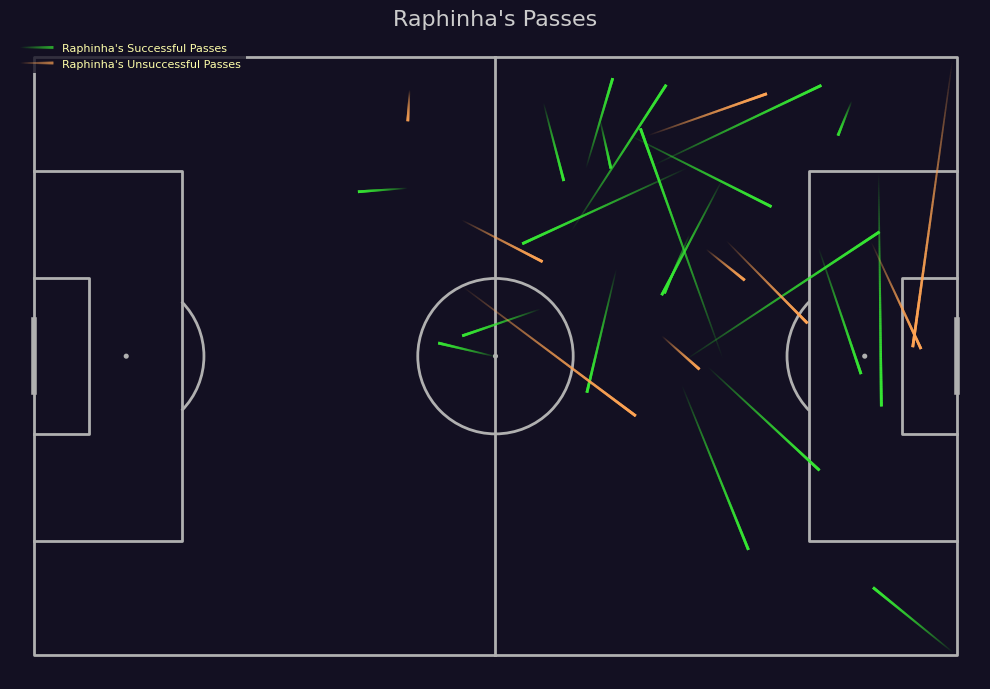

In [24]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch

pitch = Pitch(pitch_type='wyscout', pitch_color='#131022')
fig, ax = pitch.draw(figsize=(11, 7), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#131022')

lc1 = pitch.lines(df_pass_raphinha[mask_success].x, df_pass_raphinha[mask_success].y,
                  df_pass_raphinha[mask_success].endX, df_pass_raphinha[mask_success].endY,
                  lw=2, transparent=True, comet=True, label='Raphinha\'s Successful Passes',
                  color='#36E633', ax=ax)

lc2 = pitch.lines(df_pass_raphinha[~mask_success].x, df_pass_raphinha[~mask_success].y,
                  df_pass_raphinha[~mask_success].endX, df_pass_raphinha[~mask_success].endY,
                  lw=2, transparent=True, comet=True, label='Raphinha\'s Unsuccessful Passes',
                  color='#FFA454', ax=ax)
l = ax.legend(facecolor='#131022', edgecolor='None', fontsize=8, loc='upper left', handlelength=3)
for text in l.get_texts():
    text.set_color('#ffffaa')
    
ax_title = ax.set_title(f'Raphinha\'s Passes', fontsize=16, color='#ccc')
plt.gca().invert_yaxis()

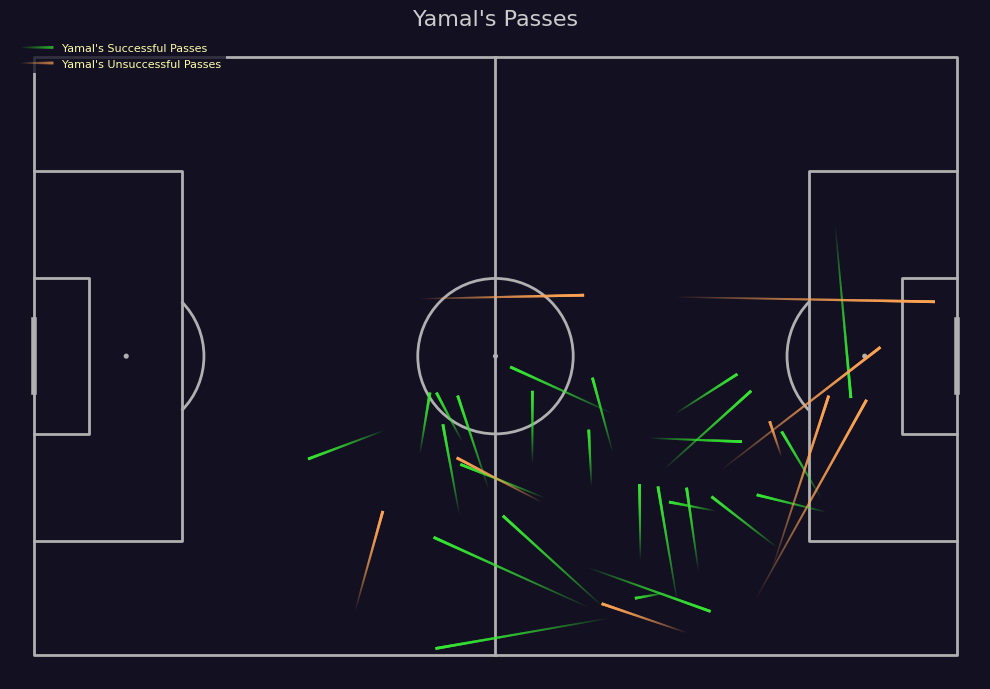

In [25]:
pitch2 = Pitch(pitch_type='wyscout', pitch_color='#131022')
fig2, ax2 = pitch2.draw(figsize=(11, 7), constrained_layout=False, tight_layout=True)
fig2.set_facecolor('#131022')

lc3 = pitch2.lines(df_pass_yamal[mask_success2].x, df_pass_yamal[mask_success2].y,
                  df_pass_yamal[mask_success2].endX, df_pass_yamal[mask_success2].endY,
                  lw=2, transparent=True, comet=True, label='Yamal\'s Successful Passes',
                  color='#36E633', ax=ax2)

lc4 = pitch2.lines(df_pass_yamal[~mask_success2].x, df_pass_yamal[~mask_success2].y,
                  df_pass_yamal[~mask_success2].endX, df_pass_yamal[~mask_success2].endY,
                  lw=2, transparent=True, comet=True, label='Yamal\'s Unsuccessful Passes',
                  color='#FFA454', ax=ax2)

l2 = ax2.legend(facecolor='#131022', edgecolor='None', fontsize=8, loc='upper left', handlelength=3)
for text in l2.get_texts():
    text.set_color('#ffffaa')

ax_title2 = ax2.set_title(f'Yamal\'s Passes', fontsize=16, color='#ccc')
plt.gca().invert_yaxis()

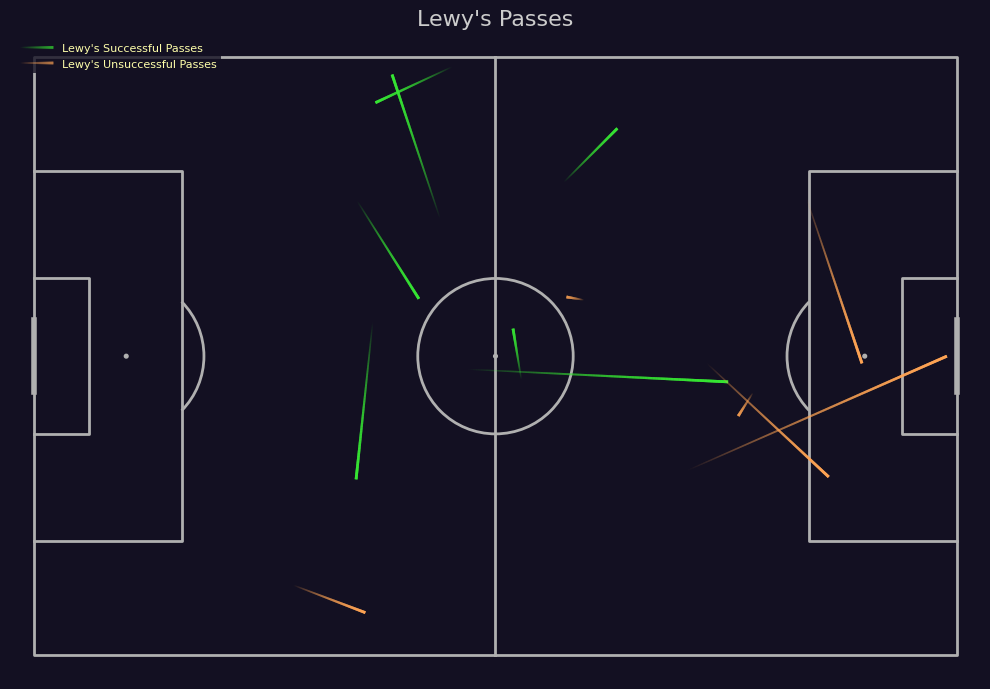

In [26]:
pitch3 = Pitch(pitch_type='wyscout', pitch_color='#131022')
fig3, ax3 = pitch3.draw(figsize=(11, 7), constrained_layout=False, tight_layout=True)
fig3.set_facecolor('#131022')

lc5 = pitch3.lines(df_pass_lewy[mask_success3].x, df_pass_lewy[mask_success3].y,
                  df_pass_lewy[mask_success3].endX, df_pass_lewy[mask_success3].endY,
                  lw=2, transparent=True, comet=True, label='Lewy\'s Successful Passes',
                  color='#36E633', ax=ax3)

lc6 = pitch3.lines(df_pass_lewy[~mask_success3].x, df_pass_lewy[~mask_success3].y,
                  df_pass_lewy[~mask_success3].endX, df_pass_lewy[~mask_success3].endY,
                  lw=2, transparent=True, comet=True, label='Lewy\'s Unsuccessful Passes',
                  color='#FFA454', ax=ax3)

l3 = ax3.legend(facecolor='#131022', edgecolor='None', fontsize=8, loc='upper left', handlelength=3)
for text in l3.get_texts():
    text.set_color('#ffffaa')

ax_title3 = ax3.set_title(f'Lewy\'s Passes', fontsize=16, color='#ccc')
plt.gca().invert_yaxis()